# Quick tangent - convoultion in the time domain == multiplication in the frequency domain
* Can implement a filter either way, but FFT method is MUCH faster
* Timeit for convolution vs multiply in freq domain
* Convolution is: the integral of the product of two functions after one is reversed and shifted systematically through time
* I.e. one function modifies, or filters, the shape of the other

![shamelessly stolen from wikipedia](https://github.com/JohnSerences/dev/blob/master/Convolution_of_box_signal_with_itself2.gif)

## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# import our sinc filter implementation function...
import my_sinc_filt as msf

# also define the default font we'll use for figures. 
fig_font = {'fontname':'Arial', 'size':'20'}

## Build a signal, just like we did before. Then low pass in time domain (conv) and in the freq domain

In [3]:
# define a set of frequencies for our simulated signal. 
# lets not add any IID noise yet so that the results turn out the same each time
Lf = 1  # lowest frequency
Hf = 16 # highest frequency

#generate list
frequs = np.linspace(Lf, Hf-1, Hf-Lf)
print(frequs)

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.]


In [6]:
# make our simulated signal
sr = 512                        # samp rate in Hz
# duration of signal, in s - make it a lot longer than usual to demonstrate the main point here...
tmax = 40                      
dt = 1/sr                       # time step, reciprocal of the sr
t = np.arange(0,tmax,dt)        # time axis

# add up a bunch of sin waves at each of our desired frequencies
sig = np.zeros(len(t))
for f in np.arange(len(frequs)):
    sig = sig + np.sin(2*np.pi*frequs[f]*t)

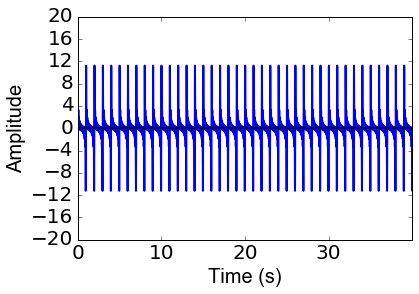

In [15]:
# Plot
plt.plot(t, sig, 'b-', linewidth = 2)    # specify x,y data...in this case time and amplitude of sin

# put some labels on the axes
plt.xlabel('Time (s)', **fig_font)
plt.ylabel('Amplitude', **fig_font)

# set the tick marks
plt.xticks(np.arange(0,tmax,10), color='k', size=20)
plt.yticks(np.linspace(-20,20,11), color='k', size=20)

# add some nice vertical/horizontal lines 
plt.axvline(0, color = 'k', linewidth = 2)
plt.axhline(0, color = 'k', linewidth = 2)

# show it
plt.show()

## Now design a low pass filter using our filter module

In [19]:
fc=0.1
b=0.1
win = 'blackman'
type_filt = 'lp'

# make our function call to generate a lp filter
n, sinc_func = msf.define_filt(fc=fc, b=b, window=win, type_filt=type_filt)

## Now FFT sig and filter, multiply, and inverse FFT

In [38]:
# call our function to FFT, multiply, and then inverseFFT
%timeit filtered_sig = msf.apply_filt(input_sig=sig, input_filter=sinc_func)

148 µs ± 5.85 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


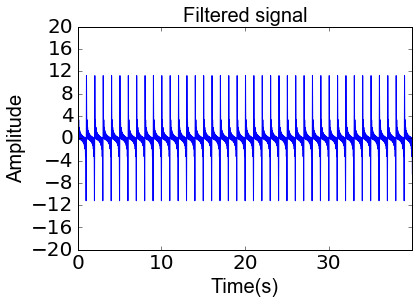

In [32]:
# plot
plt.plot(t, filtered_sig)
plt.xlabel('Time(s)', **fig_font)
plt.ylabel('Amplitude', **fig_font)
plt.xticks(np.arange(0,tmax,10), color='k', size=20)
plt.yticks(np.linspace(-20,20,11), color='k', size=20)
plt.title('Filtered signal', **fig_font)
plt.show()

## Now give it a shot with convolution in the time domain

In [39]:
%timeit filtered_sig = np.convolve(sig, sinc_func,mode='same')

559 µs ± 29.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


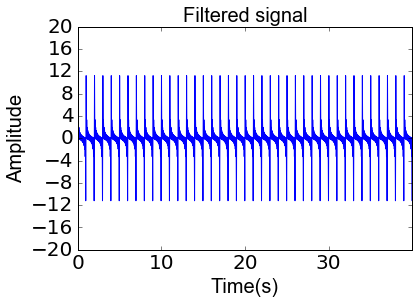

In [36]:
# plot
plt.plot(t, filtered_sig)
plt.xlabel('Time(s)', **fig_font)
plt.ylabel('Amplitude', **fig_font)
plt.xticks(np.arange(0,tmax,10), color='k', size=20)
plt.yticks(np.linspace(-20,20,11), color='k', size=20)
plt.title('Filtered signal', **fig_font)
plt.show()

## Same signal output, but my clunky FFT based function faster by ~5xs compared to built in optimized numpy time domain convolution